# P1 a * algorithm

In [6]:
tree={'S':[['A',1],['B',2]],'A':[['E',13]],'B':[['E',5]]}
heuristic={'S':5,'A':4,'B':5,'E':0}
cost={'S':0}
def AStarSearch():
    global tree,heuristic
    closed=[]
    opened=[['S',0]]
    #find the visited nodes
    while True:
        fn=[i[1] for i in opened]
        chosen_index=fn.index(min(fn))
        node=opened[chosen_index][0]
        closed.append(opened[chosen_index])
        del opened[chosen_index]
        if closed[-1][0]=='E':
            break
        for item in tree[node]:
            if item[0] in [closed_item[0] for closed_item in closed]:
                continue
            cost.update({item[0]:cost[node]+item[1]})
            fn_node=cost[node]+heuristic[item[0]]+item[1]
            temp=[item[0],fn_node]
            opened.append(temp)
    #find optimal sequence
    trace_node='E'
    optimal_sequence=['E']
    for i in range(len(closed)-2,-1,-1):
        check_node=closed[i][0]
        if trace_node in [children[0] for children in tree[check_node]]:
            children_costs=[temp[1] for temp in tree[check_node]]
            children_nodes=[temp[0] for temp in tree[check_node]]
            if cost[check_node]+children_costs[children_nodes.index(trace_node)]==cost[trace_node]:
                optimal_sequence.append(check_node)
                trace_node=check_node
    optimal_sequence.reverse()
    return closed,optimal_sequence
if __name__ == "__main__":
    visited_nodes,optimal_nodes=AStarSearch()
    print('visited nodes:' +str(visited_nodes))
    print('optimal nodes sequence:' +str(optimal_nodes))

visited nodes:[['S', 0], ['A', 5], ['B', 7], ['E', 7]]
optimal nodes sequence:['S', 'B', 'E']


# P2 ao* algorithm

In [4]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode):
        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
    def applyAOStar(self):
        self.aoStar(self.start, False)
    def getNeighbors(self, v):
        return self.graph.get(v,'')
    def getStatus(self,v):
        return self.status.get(v,0)
    def setStatus(self,v, val): 
        self.status[v]=val
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) 
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value
    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE STARTNODE:",self.start)
        print("-------------------------")
        print(self.solutionGraph)
        print("-------------------------")

    def computeMinimumCostChildNodes(self, v):
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v):
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)

            if flag==True:
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList 
                flag=False
            else:
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList 
        return minimumCost, costToChildNodeListDict[minimumCost]
    
    def aoStar(self, v, backTracking): 

        print("HEURISTIC VALUES :", self.H)
        print("SOLUTION GRAPH :", self.solutionGraph)
        print("PROCESSING NODE :", v)
        print("-------------------------")
        if self.getStatus(v) >= 0:
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))
            solved=True
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False
            if solved==True:
                self.setStatus(v,-1)
                self.solutionGraph[v]=childNodeList
            if v!=self.start:
                self.aoStar(self.parent[v], True) 
            if backTracking==False: 
                for childNode in childNodeList: 
                    self.setStatus(childNode,0)
                    self.aoStar(childNode, False)
h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I':7,'J':1}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]
}
G1= Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()

HEURISTIC VALUES : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : B
-------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : G
-------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : B
-------------------------
HEURISTIC VALUES : {'A': 10, 'B': 8, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-------------------

# p3 Candidate elimination

In [8]:
import numpy as np 
import pandas as pd

data = pd.read_csv("C:\\Users\\sdmit\\OneDrive\\Desktop\\ML-CSV\\ws.csv",header=None)
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)
def learn(concepts, target): 
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)  

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "Yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    specific_h[x] ='?'                     
                    general_h[x][x] ='?'
                   
        if target[i] == "No":            
            print("Instance is Negative ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    general_h[x][x] = specific_h[x]                
                else:                    
                    general_h[x][x] = '?'        
        
        print("Specific Bundary after ", i+1, "Instance is ", specific_h)         
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]    
    for i in indices:   
        general_h.remove(['?', '?', '?', '?', '?', '?']) 
    return specific_h, general_h 

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]

Target Values are:  ['Yes' 'Yes' 'No' 'Yes']

Initialization of specific_h and general_h

Specific Boundary:  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Instance is Positive 
Specific Bundary after  1 Instance is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



I

# p4 ID3

In [10]:
import math
import csv

def load_csv(filename):
    lines = csv.reader(open(filename,"r"));
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset, headers

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""  # NULL indicates children exists. # Not Null indicates this is a Leaf Node

def subtables(data, col, delete): 
    dic = {}
    coldata = [ row[col] for row in data]
    attr = list(set(coldata)) # All values of attribute retrived
    for k in attr:
        dic[k] = []

    for y in range(len(data)):
        key = data[y][col]
        if delete:
            del data[y][col]
        dic[key].append(data[y])
    return attr, dic

def entropy(S):
    attr = list(set(S))
    if len(attr) == 1: #if all are +ve/-ve then entropy = 0 
        return 0

    counts = [0,0] # Only two values possible 'yes' or 'no' 
    for i in range(2):
        counts[i] = sum( [1 for x in S if attr[i] == x] ) / (len(S) * 1.0)

    sums = 0
    for cnt in counts:
        sums += -1 * cnt * math.log(cnt, 2)
    return sums

def compute_gain(data, col):
    attValues, dic = subtables(data, col, delete=False)
    total_entropy = entropy([row[-1] for row in data])
    for x in range(len(attValues)):
        ratio = len(dic[attValues[x]]) / ( len(data) * 1.0)
        entro = entropy([row[-1] for row in dic[attValues[x]]]) 
        total_entropy -= ratio*entro

    return total_entropy
 
def build_tree(data, features):
    lastcol = [row[-1] for row in data]
    if (len(set(lastcol))) == 1: # If all samples have same labels return that label
        node=Node("")
        node.answer = lastcol[0]
        return node

    n = len(data[0])-1
    gains = [compute_gain(data, col) for col in range(n) ]

    split = gains.index(max(gains)) # Find max gains and returns index 
    node = Node(features[split]) # 'node' stores attribute selected #del (features[split])
    fea = features[:split]+features[split+1:]

    attr, dic = subtables(data, split, delete=True) # Data will be spilt in subtables 
    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea) 
        node.children.append((attr[x], child))

    return node

def print_tree(node, level):
    if node.answer != "":
        print("     "*level, node.answer) # Displays leaf node yes/no 
        return

    print("       "*level, node.attribute) # Displays attribute Name 
    for value, n in node.children:
        print("     "*(level+1), value) 
        print_tree(n, level + 2)

def classify(node,x_test,features): 
    if node.answer != "":
        print(node.answer) 
        return

    pos = features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos]==value: 
            classify(n,x_test,features)

#''' Main program '''
dataset, features = load_csv("C:\\Users\\sdmit\\OneDrive\\Desktop\\ML-CSV\\data3.csv") # Read Tennis data 
node = build_tree(dataset, features) # Build decision tree

print("The decision tree for the dataset using ID3 algorithm is ") 
print_tree(node, 0)

testdata, features = load_csv("C:\\Users\\sdmit\\OneDrive\\Desktop\\ML-CSV\\data3_test.csv") 
for xtest in testdata:
    print("The test instance : ",xtest) 
    print("The predicted label : ", end="") 
    classify(node,xtest,features)

The decision tree for the dataset using ID3 algorithm is 
 Outlook
      rain
               Wind
                weak
                     yes
                strong
                     no
      sunny
               Humidity
                normal
                     yes
                high
                     no
      overcast
           yes
The test instance :  ['rain', 'cool', 'normal', 'strong']
The predicted label : no
The test instance :  ['sunny', 'mild', 'normal', 'strong']
The predicted label : yes


# P5 Back Propagation(ANN) 

In [2]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5000                #Setting training iterations
lr=0.1                    #Setting learning rate
inputlayer_neurons = 2    #number of features in data set
hiddenlayer_neurons = 3   #number of hidden layers neurons
output_neurons = 1        #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    
#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
    
#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    
# dotproduct of nextlayererror and currentlayerop
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    
    
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[ 0.66666667  1.        ]
 [ 0.33333333  0.55555556]
 [ 1.          0.66666667]]
Actual Output: 
[[ 0.92]
 [ 0.86]
 [ 0.89]]
Predicted Output: 
 [[ 0.89605164]
 [ 0.87853369]
 [ 0.89461413]]


# P6 Naive Base Classifier 

In [48]:
import csv, random, math
import statistics as st
from statistics import stdev

def loadCsv(filename):
    lines = csv.reader(open(filename, "r"));
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

def splitDataset(dataset, splitRatio):
    testSize = int(len(dataset) * splitRatio);
    trainSet = list(dataset);
    testSet = []
    while len(testSet) < testSize:
        index = random.randrange(len(trainSet));
        testSet.append(trainSet.pop(index))
    return [trainSet, testSet]



def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        x = dataset[i]
        if (x[-1] not in separated):
            separated[x[-1]] = []
        separated[x[-1]].append(x)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg=mean(numbers)
    variance=sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def compute_mean_std(dataset):
    mean_std = [(st.mean(attribute), st.stdev(attribute))for attribute in zip(*dataset)];
    del mean_std[-1]
    return mean_std


def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summary = {} 
    for classValue, instances in separated.items():
        summary[classValue] = compute_mean_std(instances)
    return summary


def estimateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, testVector):
    p = {}
    for classValue, classSummaries in summaries.items():
        p[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = testVector[i] #testvector's first attribute
            p[classValue] *= estimateProbability(x, mean, stdev);
    return p
def predict(summaries, testVector):
    all_p = calculateClassProbabilities(summaries, testVector)
    bestLabel, bestProb = None, -1
    for lbl, p in all_p.items():
        if bestLabel is None or p > bestProb:
            bestProb = p
        bestLabel = lbl
    return bestLabel

def perform_classification(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return(correct/float(len(testSet))) * 100.0

dataset = loadCsv("C:\\Users\\sdmit\\OneDrive\\Desktop\\ML-CSV\\pima-indians-diabetes.csv");
print('Pima Indian Diabetes Dataset loaded...')
print('Total instances available :',len(dataset))
print('Total attributes present :',len(dataset[0])-1)
print("First Five instances of dataset:")
for i in range(5):
    print(i+1 , ':' , dataset[i])

splitRatio = 0.2
trainingSet, testSet = splitDataset(dataset, splitRatio)
print('\nDataset is split into training and testing set.')
print('Training examples = {0} \nTesting examples = {1}'.format(len(trainingSet), len(testSet)))
summaries = summarizeByClass(trainingSet)
predictions = perform_classification(summaries, testSet)
accuracy = getAccuracy(testSet, predictions)
print('\nAccuracy of the Naive Baysian Classifier is :', accuracy)

Pima Indian Diabetes Dataset loaded...
Total instances available : 768
Total attributes present : 8
First Five instances of dataset:
1 : [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
2 : [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0]
3 : [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0]
4 : [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0]
5 : [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]

Dataset is split into training and testing set.
Training examples = 615 
Testing examples = 153

Accuracy of the Naive Baysian Classifier is : 69.93464052287581


# P7  EM algorithm

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


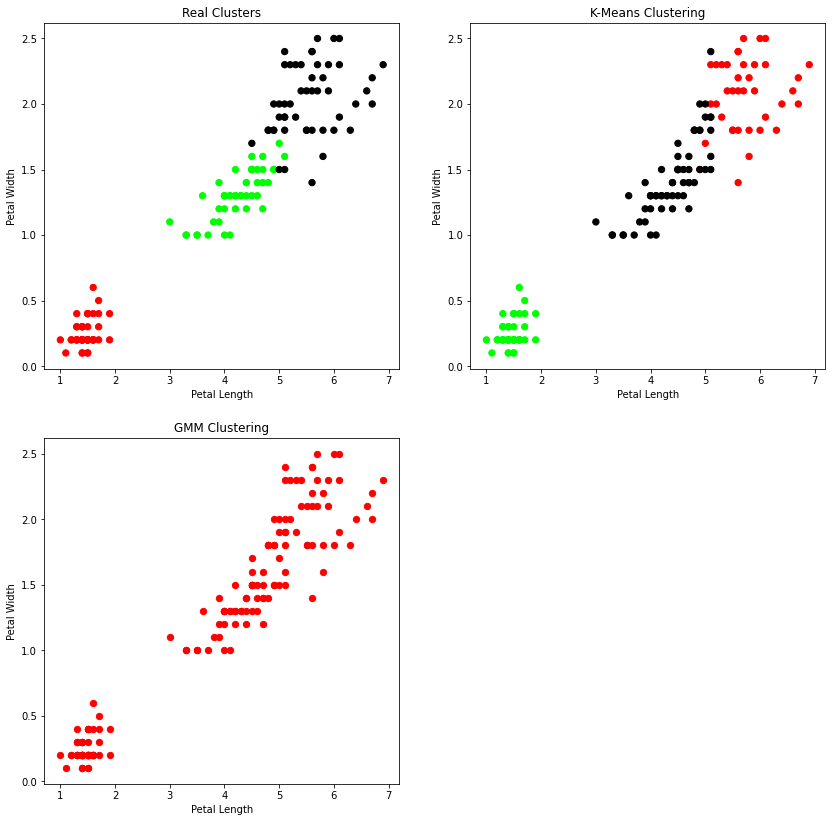

In [8]:
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np

# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[0], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=40) 
gmm.fit(xs)


print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')
plt.show()

# p8 knn

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
iris=datasets.load_iris() 
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
print("Dataset is split into training and testing")
print("size of training data and its label",x_train.shape,y_train.shape)
print("size of testing data and its label",x_test.shape,y_test.shape)

for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ") 

for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Dataset is split into training and testing
size of training data and its label (135, 4) (135,)
size of testing data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [ 6.4  3.2  4.5  1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [ 5.4  3.4  1.7  0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [ 5.5  2.4  3.8  1.1]  Actual-label: 1  Predicted-label: 1
 Sample: [ 4.9  3.1  1.5  0.1]  Actual-label: 0  Predicted-label: 0
 Sample: [ 6.9  3.1  5.4  2.1]  Actual-label: 2  Predicted-label: 2
 Sample: [ 5.7  2.8  4.5  1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [ 5.   3.4  1.5  0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [ 5.1  3.4  1.5  0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [ 7.7  3.8  6.7  2.2]  Actual-label: 2  Predicted-label: 2
 Sample: [ 6.7  3.1  4.7  1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [ 6.1  3.   4.9  1.8]  Actual-label: 2

# p9

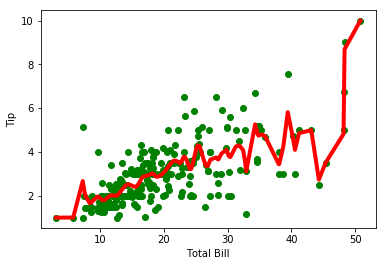

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point,xmat,k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff=point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localweightregression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
def graphplot(X,ypred):
    sortindex=X[:,1].argsort(0)
    xsort=X[sortindex][:,0]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.scatter(bill,tip,color='green')
    ax.plot(xsort[:,1],ypred[sortindex],color='red',linewidth=4)
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show();
data=pd.read_csv("C:\\Users\\sdmit\\OneDrive\\Desktop\\ML-CSV\\data10_tips.csv")
bill=np.array(data.total_bill)
tip=np.array(data.tip)
mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
X=np.hstack((one.T,mbill.T))
ypred=localweightregression(X,mtip,0.5)
graphplot(X,ypred)   